######  <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#c3b235">Artificial Neural Network (ANN)
<font color=darkblue>
    
######  <span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#d40eea">Import Libraries
<font color=darkblue>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

######  <span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#0eea3a">Plot function
<font color=darkblue>

In [30]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()


######  <span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#0e36ea">Import dataset
<font color=darkblue>

In [3]:
dataset = pd.read_csv('/Users/preethamvignesh/Downloads/ANN_model/Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


######  <span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#0e36ea">Separating Dependent and Independent variables
<font color=darkblue>

In [4]:
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values


######  <span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#ea0ebe">Encoding categorical data
<font color=darkblue>

In [5]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

#encoding 'Geography' to number
labelencoder_X1 = LabelEncoder()
X[:, 1] = labelencoder_X1.fit_transform(X[:, 1])

#encoding 'Gender' to numbers
labelencoder_X2 = LabelEncoder()
X[:, 2] = labelencoder_X2.fit_transform(X[:, 2])

#encoding 'Geography' to one hot
ct = ColumnTransformer([("Geography", OneHotEncoder(), [1])], remainder = 'passthrough')
# onehotencoder = OneHotEncoder(categorical_features = [1])
X = ct.fit_transform(X)

# get rid of dummy variable trap
X = X[:, 1:]


######  <span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#ea0ebe">Feature scaling
<font color=darkblue>

In [6]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [7]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
X= scalar.fit_transform(X)

######  <span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#ea540e">Split Train and Test set 
<font color=darkblue>

In [8]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

######  <span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#ea540e">Model preparation with layers
<font color=darkblue>

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

model = Sequential()
# Adding the input layer and the first hidden layer with dropout
model.add(Dense(units = 22, activation='relu', input_dim = 11)) # Input layer and first hidden layer
# when we assing `input_dim = 11`, we actually creating input layer
# model.add(Dropout(p=0.1))

# Adding the second hidden layer with dropout
# doesn't need the input_dim params
# kernel_initializer updates weights
# activation function - rectifier
model.add(Dense(units = 22, activation='relu')) # Second hidden layer
# model.add(Dropout(p=0.1))

# Adding the output layer
# dependent variable with more than two categories (3), output_dim needs to change (e.g. 3), activation function - sufmax
model.add(Dense(1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid' ))
model.add(Dense(units = 1, activation='sigmoid')) # Output layer

# Compiling the ANN - applying Stochastic Gradient Descent to whole ANN
# Several different SGD algorithms
# mathematical details based on the loss function
# binary_crossentropy, categorical_cross_entropy
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 22)                264       
_________________________________________________________________
dense_1 (Dense)              (None, 22)                506       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 23        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 2         
Total params: 795
Trainable params: 795
Non-trainable params: 0
_________________________________________________________________


######  <span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#ea540e">Fitting Model 
<font color=darkblue>

In [11]:
# Fitting fully connnected NN to the Training set
model.fit(X_train, y_train, batch_size = 25, epochs = 100)

Epoch 1/100
320/320 [==============================] - 1s 1ms/step - loss: 0.6082 - accuracy: 0.7979
Epoch 2/100
320/320 [==============================] - 0s 1ms/step - loss: 0.5233 - accuracy: 0.8000
Epoch 3/100
320/320 [==============================] - 0s 1ms/step - loss: 0.5012 - accuracy: 0.8030
Epoch 4/100
320/320 [==============================] - 0s 1ms/step - loss: 0.4898 - accuracy: 0.7935
Epoch 5/100
320/320 [==============================] - 0s 1ms/step - loss: 0.4699 - accuracy: 0.7944
Epoch 6/100
320/320 [==============================] - 0s 976us/step - loss: 0.4561 - accuracy: 0.7991
Epoch 7/100
320/320 [==============================] - 0s 1ms/step - loss: 0.4418 - accuracy: 0.8067
Epoch 8/100
320/320 [==============================] - 0s 1ms/step - loss: 0.4428 - accuracy: 0.8002
Epoch 9/100
320/320 [==============================] - 0s 1ms/step - loss: 0.4451 - accuracy: 0.7959
Epoch 10/100
320/320 [==============================] - 0s 1ms/step - loss: 0.4338 - accu

320/320 [==============================] - 0s 1ms/step - loss: 0.3353 - accuracy: 0.8651
Epoch 82/100
320/320 [==============================] - 0s 1ms/step - loss: 0.3395 - accuracy: 0.8630
Epoch 83/100
320/320 [==============================] - 0s 1ms/step - loss: 0.3509 - accuracy: 0.8582
Epoch 84/100
320/320 [==============================] - 0s 1ms/step - loss: 0.3422 - accuracy: 0.8625
Epoch 85/100
320/320 [==============================] - 0s 1ms/step - loss: 0.3509 - accuracy: 0.8633
Epoch 86/100
320/320 [==============================] - 0s 1ms/step - loss: 0.3443 - accuracy: 0.8650
Epoch 87/100
320/320 [==============================] - 0s 1ms/step - loss: 0.3327 - accuracy: 0.8644
Epoch 88/100
320/320 [==============================] - 0s 1ms/step - loss: 0.3512 - accuracy: 0.8586
Epoch 89/100
320/320 [==============================] - 0s 1ms/step - loss: 0.3375 - accuracy: 0.8661
Epoch 90/100
320/320 [==============================] - 0s 1ms/step - loss: 0.3360 - accuracy: 

######  <span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#ea540e">Model Evaluate 
<font color=darkblue>

In [12]:
model.evaluate(X_test,y_test)

63/63 [==============================] - 0s 991us/step - loss: 0.3506 - accuracy: 0.8530


[0.35060611367225647, 0.8529999852180481]

In [13]:
# Predicting on the Test set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

In [14]:
# Get acurracy on Test set
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_test, y_pred)
cm_test

array([[1490,   86],
       [ 208,  216]])

Epoch 1/20
154/154 [==============================] - 0s 2ms/step - loss: 0.3197 - accuracy: 0.8727 - val_loss: 0.3521 - val_accuracy: 0.8465
Epoch 2/20
154/154 [==============================] - 0s 2ms/step - loss: 0.3175 - accuracy: 0.8725 - val_loss: 0.3513 - val_accuracy: 0.8540
Epoch 3/20
154/154 [==============================] - 0s 2ms/step - loss: 0.3201 - accuracy: 0.8735 - val_loss: 0.3490 - val_accuracy: 0.8525
Epoch 4/20
154/154 [==============================] - 0s 2ms/step - loss: 0.3178 - accuracy: 0.8730 - val_loss: 0.3488 - val_accuracy: 0.8530
Epoch 5/20
154/154 [==============================] - 0s 2ms/step - loss: 0.3168 - accuracy: 0.8731 - val_loss: 0.3504 - val_accuracy: 0.8540
Epoch 6/20
154/154 [==============================] - 0s 2ms/step - loss: 0.3170 - accuracy: 0.8711 - val_loss: 0.3464 - val_accuracy: 0.8545
Epoch 7/20
154/154 [==============================] - 0s 2ms/step - loss: 0.3173 - accuracy: 0.8745 - val_loss: 0.3470 - val_accuracy: 0.8535
Epoch 

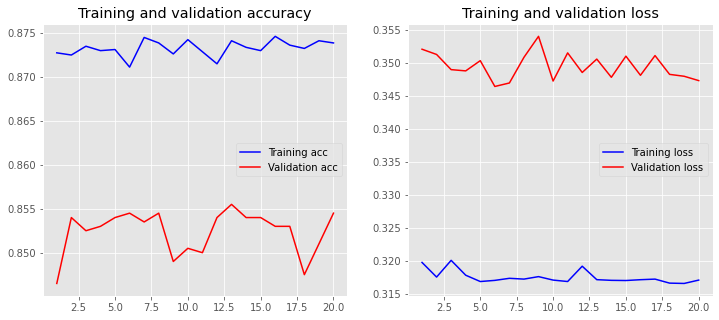

In [31]:
history = model.fit(X_train, y_train,
                    epochs=20,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=52)

loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [21]:
y_pred = model.predict(X_test)
y_pred = y_pred > 0.5

con_res = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(confusion_matrix(y_test,y_pred))
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred)*100))



Confusion matrix:
[[1540   36]
 [ 251  173]]
Accuracy: 85.65%


######  <span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#ea540e">Metrix: Confusion Matrix 
<font color=darkblue>

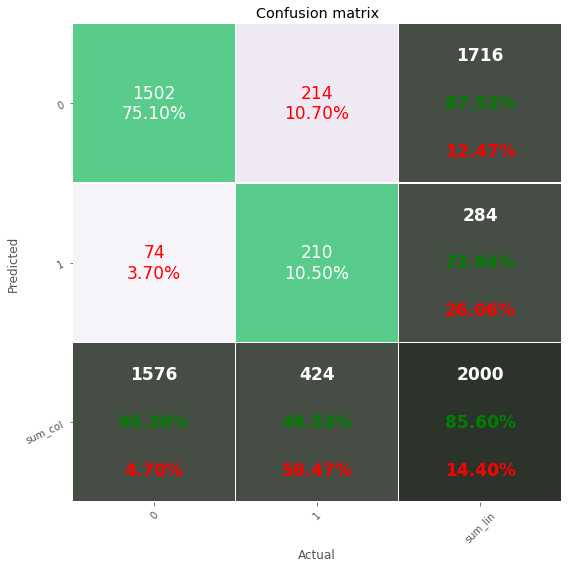

In [17]:
%run -i 'confusion_matrix_different_ways.py'
df_confmatrx = pd.DataFrame(con_res, range(2),range(2))
df_confmatrx
cmap = 'PuRd'
confusion_matrix_dfrntway(df_confmatrx, cmap=cmap,fz=17)

######  <span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#ea540e">Predicting single observation 
<font color=darkblue>

In [18]:
#  Predicting a single new observation
new_prediction = model.predict(sc.transform(np.array([[0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])))
new_prediction = (new_prediction > 0.5)
print(new_prediction)

[[False]]
